# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [4]:
file = r"C:\Users\AKIN-JOHNSON\Desktop\Workspace\housing\DKHousing\DKHousingPricesSample100k.csv"
df = pd.read_csv(file)
df.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN


# Data Wrangling

In [6]:
# finding out the number of rows and columns of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 100000 rows and 19 columns


In [7]:
# # finding the unique values of each column

# for column in df.columns:
#     unique = df[column].unique()  # Get unique values in the column
#     print(f'Unique values in column "{column}": {unique}')


In [8]:
# checking for missing value
print(f'Total missing values of the dataset:\n{df.isnull().sum()}')

Total missing values of the dataset:
date                                    0
quarter                                 0
house_id                                0
house_type                              0
sales_type                              0
year_build                              0
purchase_price                          0
%_change_between_offer_and_purchase     0
no_rooms                                0
sqm                                     0
sqm_price                               0
address                                 0
zip_code                                0
city                                   11
area                                    0
region                                  0
nom_interest_rate%                      0
dk_ann_infl_rate%                      77
yield_on_mortgage_credit_bonds%        77
dtype: int64


In [9]:
# handling missing values

# Find the mode (most frequent value) of the 'city' column
mode_city = df['city'].mode()[0]

# Fill missing values in 'city' column with the mode
df['city'].fillna(mode_city, inplace=True)

# drop columns
df.drop(columns=['dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%'], axis=1, inplace=True)

# Verify if missing values are filled
df.isnull().sum()  # Should print 0 if all missing values are filled

date                                   0
quarter                                0
house_id                               0
house_type                             0
sales_type                             0
year_build                             0
purchase_price                         0
%_change_between_offer_and_purchase    0
no_rooms                               0
sqm                                    0
sqm_price                              0
address                                0
zip_code                               0
city                                   0
area                                   0
region                                 0
nom_interest_rate%                     0
dtype: int64

In [10]:
# checking for duplicate
df.duplicated().sum()

0

In [11]:
df.dtypes

date                                    object
quarter                                 object
house_id                                 int64
house_type                              object
sales_type                              object
year_build                               int64
purchase_price                           int64
%_change_between_offer_and_purchase    float64
no_rooms                                 int64
sqm                                    float64
sqm_price                              float64
address                                 object
zip_code                                 int64
city                                    object
area                                    object
region                                  object
nom_interest_rate%                     float64
dtype: object

In [12]:
# correcting datatypes
df['date'] = pd.to_datetime(df['date'])

# extract the months and the year
df['transaction_month'] = df['date'].dt.strftime('%b')
df['transaction_year'] = df['date'].dt.year

# delete the date column
df.drop('date', axis=1, inplace=True)

df.head()

,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,transaction_month,transaction_year
0,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,Oct,2024
1,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,Oct,2024
2,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,Oct,2024
3,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,Oct,2024
4,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,Oct,2024


In [13]:
# replace values in the sales type column
df['sales_type'] = df['sales_type'].replace({'regular_sale':'Regular sale',
                                            'family_sale':'Family sale',
                                            'other_sale':'Other sale',
                                            'auction':'Auction'})
df['area'] = df['area'].replace({'Fyn & islands':'Funen',
                                'East & mid jutland':'East and Mid jutland',
                                'Capital, Copenhagen':'Copenhagen'})
df.head(1)

,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,transaction_month,transaction_year
0,2024Q4,16,Villa,Regular sale,1997,6500000,-3.0,5,142.0,45774.65,Spættevej 16,2680,Solrød Strand,Copenhagen,Zealand,3.1,Oct,2024


In [14]:
# filter the dataset with the year built to reduce load on my local system.
# Its completly optional
df = df[df['year_build'] >= 1960].reset_index()
df.head()

,index,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,transaction_month,transaction_year
0,0,2024Q4,16,Villa,Regular sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,Copenhagen,Zealand,3.1,Oct,2024
1,3,2024Q4,29,Villa,Regular sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,Oct,2024
2,4,2024Q4,92,Apartment,Regular sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,Oct,2024
3,6,2024Q4,100,Summerhouse,Regular sale,1970,360000,0.0,3,42.0,8571.429,Alkærvej 9,2740,Skovlunde,Copenhagen,Zealand,3.1,Oct,2024
4,7,2024Q4,125,Townhouse,Family sale,1980,700000,0.0,2,62.0,11290.322,Kirkebyen 3F,7950,Erslev,South jutland,Jutland,3.1,Oct,2024


# Exploratory Data Analysis

    house_type  purchase_price
0    Apartment      2450069.87
1         Farm      3083056.05
2  Summerhouse      1204220.07
3    Townhouse      2151610.47
4        Villa      1815018.01


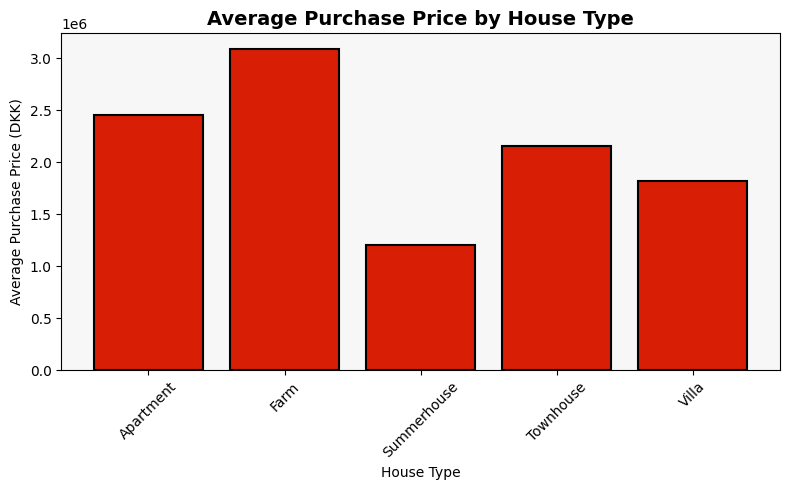

In [16]:
# 1. Calculate the average purchase price for each house type
average_purchase_price = round(df.groupby('house_type')['purchase_price'].mean().reset_index(), 2)
print(average_purchase_price)


# Denmark-Inspired Color Palette
denmark_red = '#D81E05'  # Danish Flag Red
sky_blue = '#4682B4'     # Soft Blue
black = 'black'          # black
gray = '#D9D9D9'         # Light Gray
background = '#F7F7F7'   # Neutral Background

plt.figure(figsize=(8, 5))
plt.bar(
    x=average_purchase_price['house_type'], 
    height=average_purchase_price['purchase_price'], 
    color=denmark_red,       # Bar color
    edgecolor='black',       # Edge color
    linewidth=1.5            # Edge thickness
)
plt.title('Average Purchase Price by House Type', fontsize=14, fontweight='bold', color=black)
plt.xlabel('House Type', color=black)
plt.ylabel('Average Purchase Price (DKK)', color=black)
plt.xticks(rotation=45, fontsize=10)
plt.gca().set_facecolor(background)  # Set the plot background
plt.tight_layout()
plt.show()

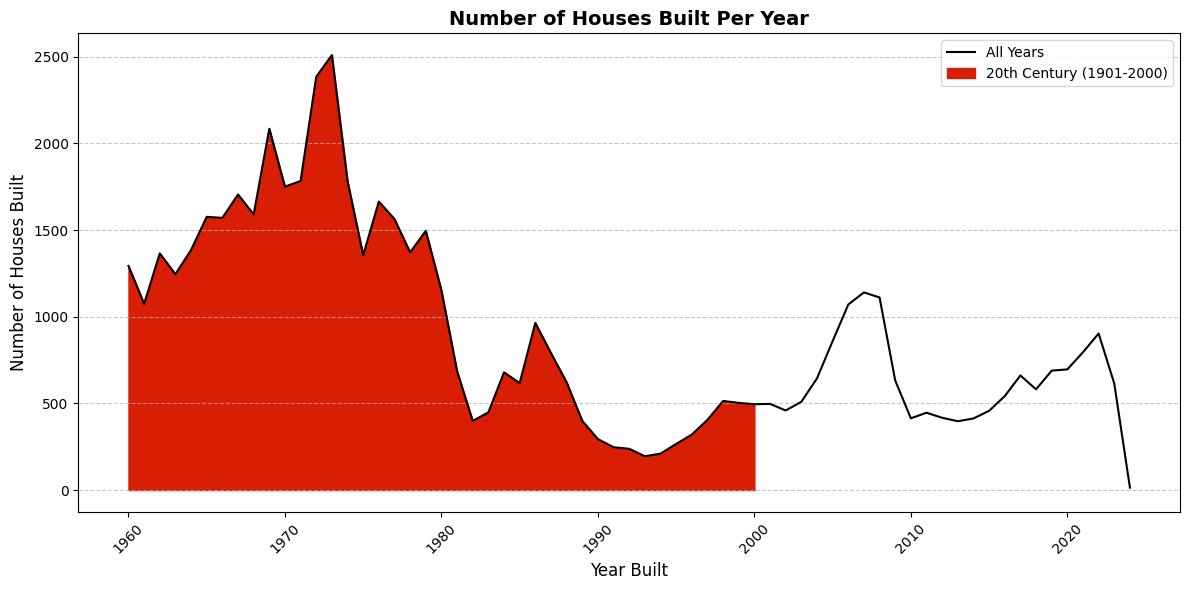

In [17]:
# # 2. Which year had the most houses built (year_build) in this dataset?
# year_built_house = df.groupby('year_build')['year_build'].value_counts().reset_index()
# year_built_house

# # from my finding, it was observed that more houses where built in the 20th century ie within 1901 to 2000




# Count the number of houses built each year
year_built_house = df['year_build'].value_counts().sort_index()
century_20th = year_built_house[(year_built_house.index >= 1901) & (year_built_house.index <= 2000)]

# Plot: Histogram or Line Plot for Houses Built Per Year
plt.figure(figsize=(12, 6))

# Line plot for all years
plt.plot(year_built_house.index, year_built_house.values, color=black, label='All Years')

# Highlight 20th Century
plt.fill_between(century_20th.index, century_20th.values, color=denmark_red, label='20th Century (1901-2000)')

# Titles and Labels
plt.title('Number of Houses Built Per Year', fontsize=14, fontweight='bold', color=black)
plt.xlabel('Year Built', fontsize=12, color=black)
plt.ylabel('Number of Houses Built', fontsize=12, color=black)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')

# Tweak x-axis for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


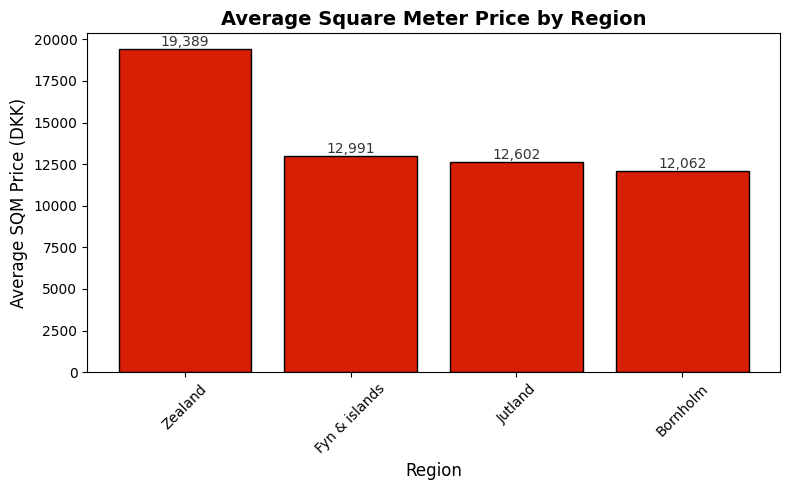

In [18]:
# 3. What is the average sqm_price for each region?

average_sqm_price_per_region = df.groupby('region')['sqm_price'].mean().reset_index()

# Sort the values for better readability
average_sqm_price_per_region = average_sqm_price_per_region.sort_values(by='sqm_price', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(
    average_sqm_price_per_region['region'], 
    average_sqm_price_per_region['sqm_price'], 
    color=denmark_red, 
    edgecolor=black
)

# Add title and labels
plt.title('Average Square Meter Price by Region', fontsize=14, fontweight='bold', color=black)
plt.xlabel('Region', fontsize=12, color=black)
plt.ylabel('Average SQM Price (DKK)', fontsize=12, color=black)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval, 
        f'{yval:,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='#333333'
    )

# Improve x-axis readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


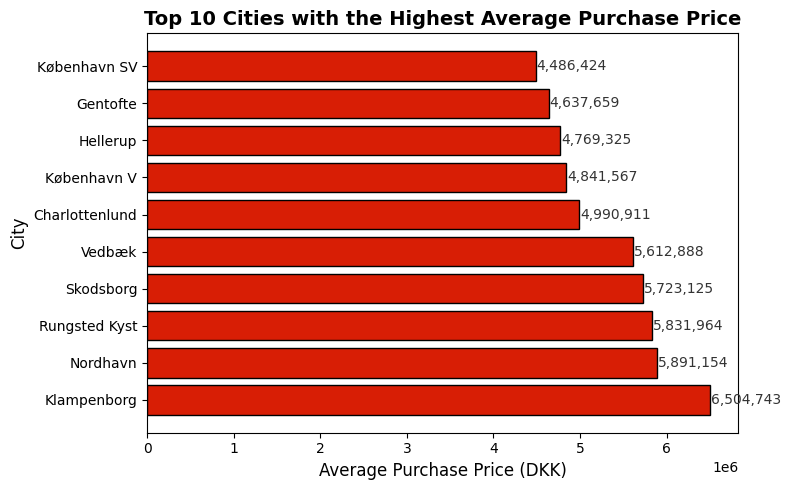

In [19]:
# 4. Which city has the highest average purchase price?

average_price_by_city = round(df.groupby('city')['purchase_price'].mean().sort_values(ascending=False).reset_index(), 2)
top_10_cities = average_price_by_city.head(10)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(
    top_10_cities['city'], 
    top_10_cities['purchase_price'], 
    color=denmark_red, 
    edgecolor=black
)

# Add title and labels
plt.title('Top 10 Cities with the Highest Average Purchase Price', fontsize=14, fontweight='bold', color=black)
plt.xlabel('Average Purchase Price (DKK)', fontsize=12, color=black)
plt.ylabel('City', fontsize=12, color=black)

# Add value labels on the bars
for bar in bars:
    plt.text(
        bar.get_width() + 10000,  # Position the label to the right of the bar
        bar.get_y() + bar.get_height()/2, 
        f'{bar.get_width():,.0f}', 
        va='center', 
        fontsize=10, 
        color='#333333'
    )

# Tight layout to ensure no clipping
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

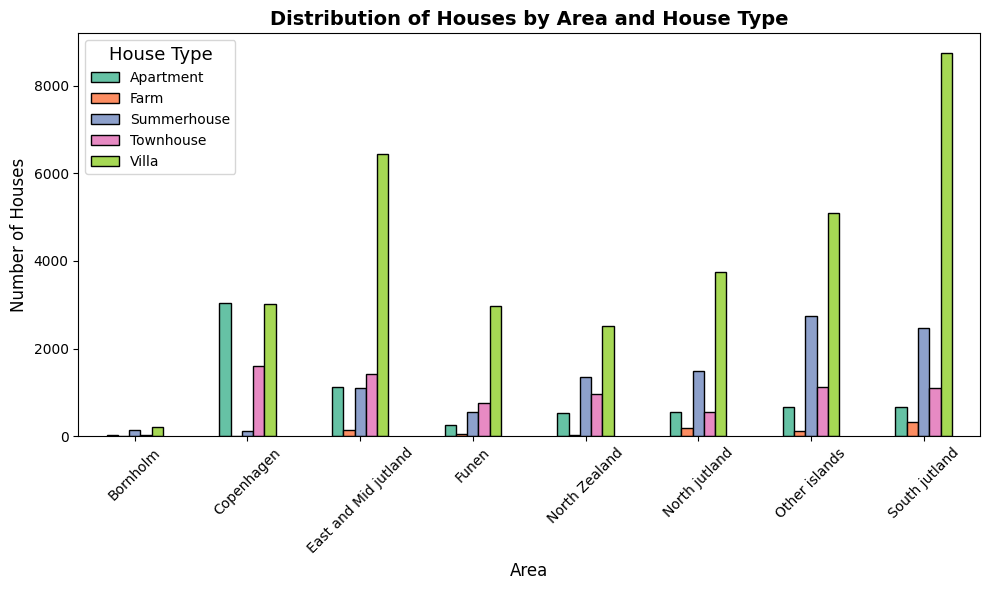

In [20]:
# 5. What is the distribution of houses by area and house_type?

area_house_distribution = pd.crosstab(df['area'], df['house_type'])

# Plot
plt.figure(figsize=(10, 6))
area_house_distribution.plot(kind='bar', stacked=False, color=sns.color_palette("Set2"), edgecolor=black, figsize=(10,6))

# Add title and labels
plt.title('Distribution of Houses by Area and House Type', fontsize=14, fontweight='bold', color=black)
plt.xlabel('Area', fontsize=12, color=black)
plt.ylabel('Number of Houses', fontsize=12, color=black)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend(title='House Type', title_fontsize='13', loc='upper left')

# Tight layout to ensure no clipping
plt.tight_layout()

# Show the plot
plt.show()


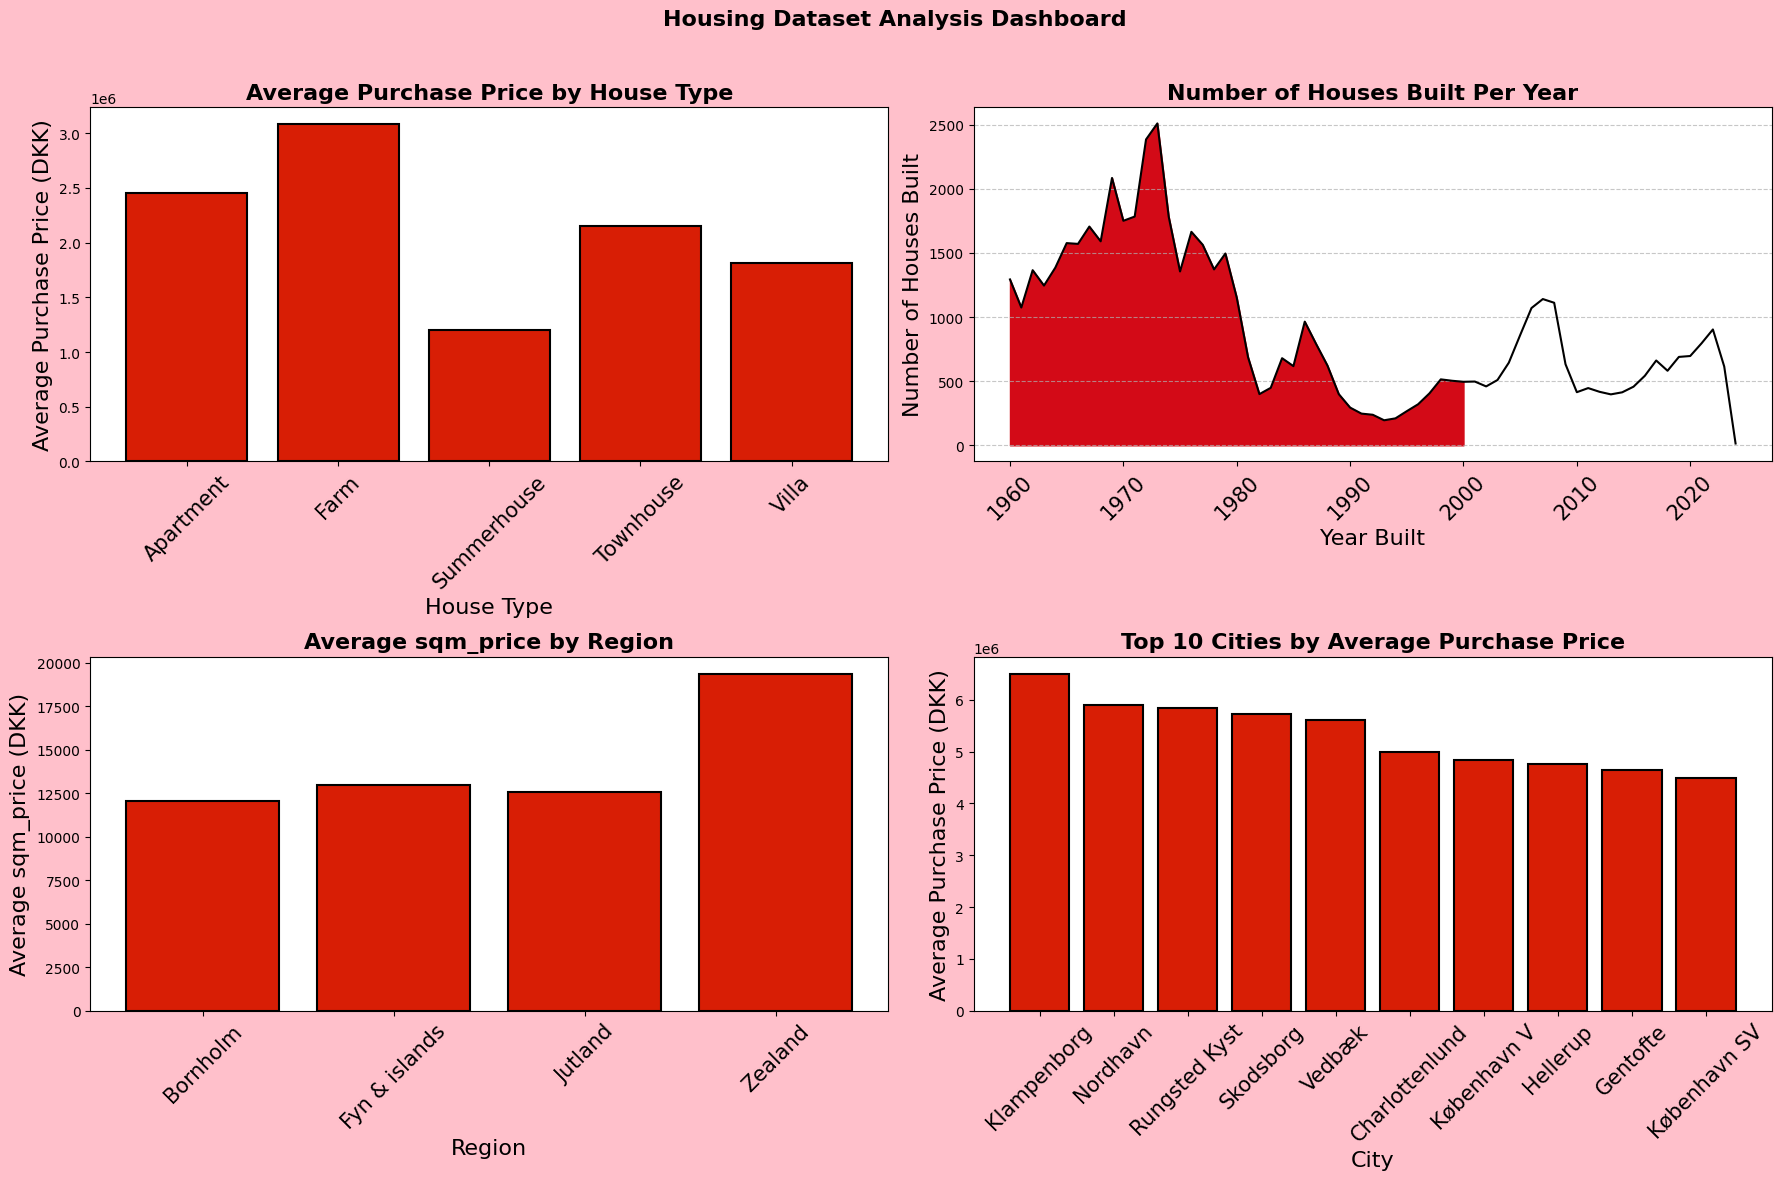

In [21]:
# Create a figure and a 2x3 grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Set a global title for the dashboard
fig.suptitle('Housing Dataset Analysis Dashboard', fontsize=16, fontweight='bold')

# Set the background color for the entire figure
fig.patch.set_facecolor('pink')

# 1. Average purchase price by house type
average_purchase_price = round(df.groupby('house_type')['purchase_price'].mean().reset_index(), 2)
axes[0, 0].bar(average_purchase_price['house_type'], average_purchase_price['purchase_price'], color=denmark_red, edgecolor=black, linewidth=1.5)
axes[0, 0].set_title('Average Purchase Price by House Type',fontsize=16, fontweight='bold', color='black')
axes[0, 0].set_xlabel('House Type', fontsize=16, color='black')
axes[0, 0].set_ylabel('Average Purchase Price (DKK)', fontsize=16, color='black')
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=15)

# 2. Number of houses built per year with emphasis on the 20th century
year_built_house = df['year_build'].value_counts().sort_index()
century_20th = year_built_house[(year_built_house.index >= 1901) & (year_built_house.index <= 2000)]
axes[0, 1].plot(year_built_house.index, year_built_house.values, color='black', label='All Years')
axes[0, 1].fill_between(century_20th.index, century_20th.values, color='#D30A17', label='20th Century (1901-2000)')
axes[0, 1].set_title('Number of Houses Built Per Year', fontsize=16, fontweight='bold', color='black')
axes[0, 1].set_xlabel('Year Built', fontsize=16, color='black')
axes[0, 1].set_ylabel('Number of Houses Built', fontsize=16, color='black')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
#axes[0, 1].legend(loc='upper right')
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=15)

# 3. Average sqm_price by region
average_sqm_price_per_region = df.groupby('region')['sqm_price'].mean().reset_index()
axes[1, 0].bar(average_sqm_price_per_region['region'], average_sqm_price_per_region['sqm_price'], color=denmark_red, edgecolor=black, linewidth=1.5)
axes[1, 0].set_title('Average sqm_price by Region',fontsize=16, fontweight='bold', color='black')
axes[1, 0].set_xlabel('Region', fontsize=16, color='black')
axes[1, 0].set_ylabel('Average sqm_price (DKK)', fontsize=16, color='black')
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=15)

# 4. City with highest average purchase price
average_price_by_city = round(df.groupby('city')['purchase_price'].mean().sort_values(ascending=False).reset_index(), 2)
axes[1, 1].bar(average_price_by_city['city'][:10], average_price_by_city['purchase_price'][:10], color=denmark_red, edgecolor=black, linewidth=1.5)
axes[1, 1].set_title('Top 10 Cities by Average Purchase Price',fontsize=16, fontweight='bold', color='black')
axes[1, 1].set_xlabel('City', fontsize=16, color='black')
axes[1, 1].set_ylabel('Average Purchase Price (DKK)', fontsize=16, color='black')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=15)


# Adjust layout to prevent overlapping and improve spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout so that the global title is not clipped

# Show the plot
plt.show()


# Machine Learning

In [23]:
# import necessary libraries for machine learning
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
# lets see the dataset we want to work with
df.head()

,index,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,transaction_month,transaction_year
0,0,2024Q4,16,Villa,Regular sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,Copenhagen,Zealand,3.1,Oct,2024
1,3,2024Q4,29,Villa,Regular sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,Oct,2024
2,4,2024Q4,92,Apartment,Regular sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,Oct,2024
3,6,2024Q4,100,Summerhouse,Regular sale,1970,360000,0.0,3,42.0,8571.429,Alkærvej 9,2740,Skovlunde,Copenhagen,Zealand,3.1,Oct,2024
4,7,2024Q4,125,Townhouse,Family sale,1980,700000,0.0,2,62.0,11290.322,Kirkebyen 3F,7950,Erslev,South jutland,Jutland,3.1,Oct,2024


In [25]:
# lets drop columns that may not be needed for training
df = df.drop(columns=['quarter', 'index', 'year_build', 'house_id', '%_change_between_offer_and_purchase',
                      'address', 'zip_code', 'nom_interest_rate%', 'transaction_month'], axis=1)
df.head()

,house_type,sales_type,purchase_price,no_rooms,sqm,sqm_price,city,area,region,transaction_year
0,Villa,Regular sale,6500000,5,142.0,45774.650,Solrød Strand,Copenhagen,Zealand,2024
1,Villa,Regular sale,1630000,4,186.0,8763.440,Kalundborg,Other islands,Zealand,2024
2,Apartment,Regular sale,1975000,3,82.0,24085.365,Farum,North Zealand,Zealand,2024
3,Summerhouse,Regular sale,360000,3,42.0,8571.429,Skovlunde,Copenhagen,Zealand,2024
4,Townhouse,Family sale,700000,2,62.0,11290.322,Erslev,South jutland,Jutland,2024


In [26]:
# use labelEncoder for categorical variable

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column individually
categorical_columns = ['house_type', 'sales_type', 'city', 'area', 'region']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,house_type,sales_type,purchase_price,no_rooms,sqm,sqm_price,city,area,region,transaction_year
0,4,3,6500000,5,142.0,45774.650,469,1,3,2024
1,4,3,1630000,4,186.0,8763.440,279,6,3,2024
2,0,3,1975000,3,82.0,24085.365,131,4,3,2024
3,2,3,360000,3,42.0,8571.429,455,1,3,2024
4,3,1,700000,2,62.0,11290.322,120,7,2,2024


### Train test split

In [28]:
# split the dataset into features and target
X = df.drop('purchase_price', axis=1)
y = df['purchase_price']

# split into traimimg and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

# print the shapes of the splits
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(46356, 9) (46356,)
(11590, 9) (11590,)


In [29]:
%%time
# Create a dictionary that carries the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=40),
    'Random Forest': RandomForestRegressor(random_state=40)
}

# Initialize an empty list to store the results
results = []

# Use a loop to train these models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model on training data
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate the model on testing data
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Print the results for training and testing data
    print(f"Model: {model_name}")
    print(f"Training Metrics: MAE = {mae_train:.2f}, MSE = {mse_train:.2f}, R2 = {r2_train:.2f}")
    print(f"Testing Metrics:  MAE = {mae_test:.2f}, MSE = {mse_test:.2f}, R2 = {r2_test:.2f}")
    print("-" * 80)

    # Store the results in the list
    results.append({
        'Model': model_name,
        'MAE_Train': mae_train,
        'MAE_Test': mae_test,
        'MSE_Train': mse_train,
        'MSE_Test': mse_test,
        'R2_Train': r2_train,
        'R2_Test': r2_test
    })

# Convert the results to a DataFrame for easier comparison
results_df = pd.DataFrame(results)

# Display the results
results_df


Model: Linear Regression
Training Metrics: MAE = 332802.22, MSE = 387274119229.92, R2 = 0.84
Testing Metrics:  MAE = 332722.36, MSE = 342353057852.41, R2 = 0.85
--------------------------------------------------------------------------------
Model: Decision Tree
Training Metrics: MAE = 0.00, MSE = 0.00, R2 = 1.00
Testing Metrics:  MAE = 22423.92, MSE = 7900923639.38, R2 = 1.00
--------------------------------------------------------------------------------
Model: Random Forest
Training Metrics: MAE = 3919.80, MSE = 1502068103.03, R2 = 1.00
Testing Metrics:  MAE = 9050.03, MSE = 2017095292.52, R2 = 1.00
--------------------------------------------------------------------------------
CPU times: total: 23.1 s
Wall time: 25.7 s


,Model,MAE_Train,MAE_Test,MSE_Train,MSE_Test,R2_Train,R2_Test
0,Linear Regression,332802.216418,332722.361100,3.872741e+11,3.423531e+11,0.836327,0.848929
1,Decision Tree,0.000000,22423.924159,0.000000e+00,7.900924e+09,1.000000,0.996514
2,Random Forest,3919.796586,9050.033109,1.502068e+09,2.017095e+09,0.999365,0.999110


### Cross Validation

Cross-Validation R2 Scores for Random Forest: [0.99923675 0.99705064 0.99896925 0.96336698 0.99922494]
Mean R2 Score: 0.9915697122306621


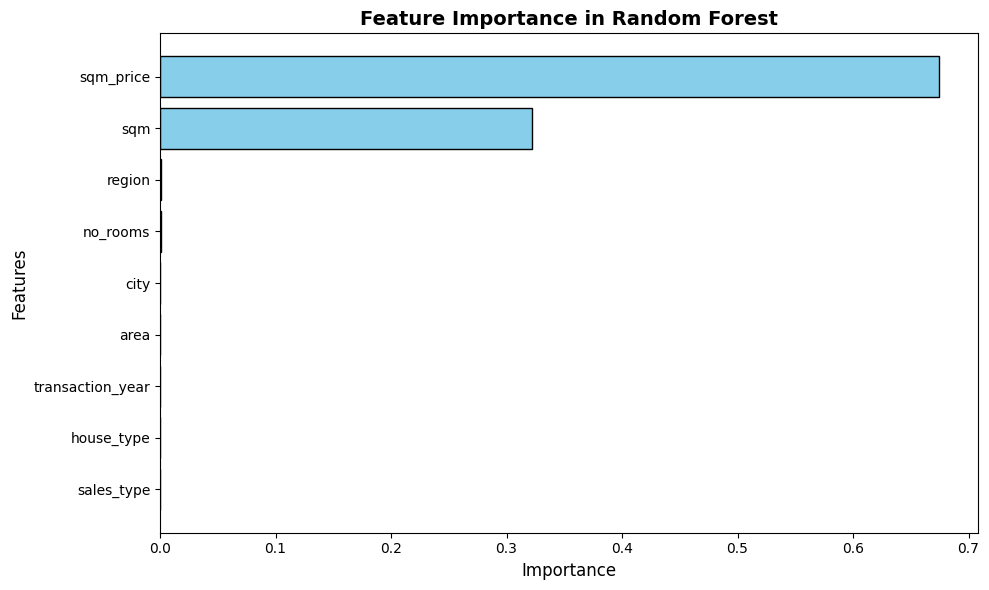

CPU times: total: 2min 7s
Wall time: 2min 9s


In [31]:
%%time
# Cross-validation for Random Forest
rf_model = RandomForestRegressor(random_state=40)
cv_scores = cross_val_score(rf_model, X, y, scoring='r2', cv=5)  # 5-fold cross-validation

print("Cross-Validation R2 Scores for Random Forest:", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))

# Train Random Forest on the full training data to check feature importance
rf_model.fit(X_train, y_train)

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.title('Feature Importance in Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


### Lasso and Ridge

In [33]:
%%time
# Hyperparameter for regularization
alpha = 1.0  # You can tune this value using GridSearchCV for better results

# Ridge Regression
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
print("Ridge Regression:")
print(f"Training R2: {ridge_train_r2:.2f}, Testing R2: {ridge_test_r2:.2f}")

# Lasso Regression
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
print("\nLasso Regression:")
print(f"Training R2: {lasso_train_r2:.2f}, Testing R2: {lasso_test_r2:.2f}")

Ridge Regression:
Training R2: 0.84, Testing R2: 0.85

Lasso Regression:
Training R2: 0.84, Testing R2: 0.85
CPU times: total: 109 ms
Wall time: 51.9 ms
